Exercise 1: Bayesian A testing for Swedish Fish Incorporated (B comes later)
=======================
### *Rasmus Bååth (adapted for Python by Christophe Carvenius)*

Swedish Fish Incorporated is the largest Swedish company delivering fish by mail order. They are now trying to get into the lucrative Danish market by selling one year Salmon subscriptions. The marketing department have done a pilot study and tried the following marketing method:

**A:** Sending a mail with a colorful brochure that invites people to sign up for a one year salmon subscription.

The marketing department sent out 16 mails of type A. Six Danes that received a mail signed up for one year of salmon and marketing now wants to know, how good is method A?

*At the bottom of this document you’ll find a solution. But try yourself first!*


Question I, Build a Bayesian model that answers the question: What would the rate of sign-up be if method A was used on a larger number of people?
-------------------
**Hint 1:** The answer is not a single number but a distribution over probable rates of sign-up.

**Hint 2:** As part of you generative model you’ll want to use the binomial distribution, which you can sample from in R using the `np.random.binomial(n, p, size)`. The binomial distribution simulates the following process n times: The number of “successes” when performing size trials, where the probability of “success” is p.

**Hint 3:** A commonly used prior for the unknown probability of success in a binomial distribution is a uniform distribution from 0 to 1. You can draw from this distribution by running `np.random.uniform(0, 1, size = n_draws)`

**Hint 4:** Here is a code scaffold that you can build upon.
 

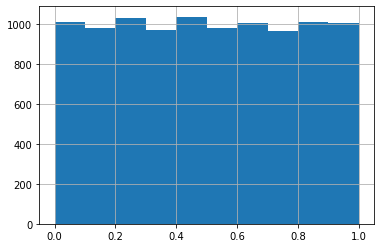

In [17]:
# Import libraries
import pandas as pd
import numpy as np

# Number of random draws from the prior
n_draws = 10000

# Here you sample n_draws draws from the prior into a pandas Series (to have convenient
# methods available for histograms and descriptive statistics, e.g. median)
prior = pd.Series(np.random.uniform(0,1,n_draws))  

prior.hist() # It's always good to eyeball the prior to make sure it looks ok.



Number of draws left: 558, Posterior median: 0.388, Posterior quantile interval: 0.164-0.628


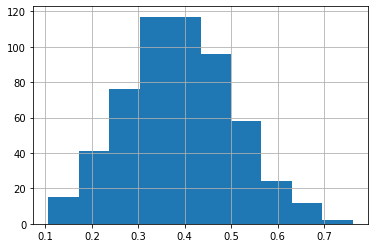

In [18]:
# Here you define the generative model
def generative_model(parameters):
    return(np.random.binomial(16, parameters))

# Here you simulate data using the parameters from the prior and the 
# generative model
sim_data = list()
for p in prior:
    sim_data.append(generative_model(p))
                    
# Here you filter off all draws that do not match the data.
posterior = prior[list(map(lambda x: x == 6, sim_data))]

posterior.hist() # Eyeball the posterior


# See that we got enought draws left after the filtering. 
# There are no rules here, but you probably want to aim for >1000 draws.

# Now you can summarize the posterior, where a common summary is to take the mean or the median posterior, 
# and perhaps a 95% quantile interval.
print('Number of draws left: %d, Posterior median: %.3f, Posterior quantile interval: %.3f-%.3f' % 
      (len(posterior), posterior.median(), posterior.quantile(.025), posterior.quantile(.975)))
print('')

Question II, What’s the probability that method A is better than telemarketing?
----------------
So marketing just told us that the rate of sign-up would be 20% if salmon subscribers were snared by a telemarketing campaign instead (to us it’s very unclear where marketing got this very precise number from). So given the model and the data that we developed in the last question, what’s the probability that method A has a higher rate of sign-up than telemarketing?

**Hint 1:** If you have a vector of samples representing a probability distribution, which you should have from the last question, calculating the amount of probability above a certain value is done by simply *counting* the number of samples above that value and dividing by the total number of samples.

**Hint 2:** The answer to this question is a one-liner.

Question III, If method A was used on 100 people what would be number of sign-ups?
--------------

**Hint 1:** The answer is again not a single number but a distribution over probable number of sign-ups.

**Hint 2:** As before, the binomial distribution is a good candidate for how many people that sign up out of the 100 possible.

**Hint 3:** Make sure you don’t “throw away” uncertainty, for example by using a summary of the posterior distribution calculated in the first question. Use the full original posterior sample!

**Hint 4:** The general patter when calculating “derivatives” of posterior samples is to go through the values one-by-one, and perform a transformation (say, plugging in the value in a binomial distribution), and collect the new values in a vector.

 

Solutions (but this can be done in many ways)
==============
Question I
--------------

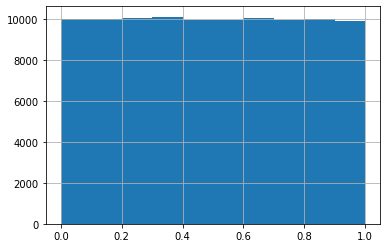

In [19]:
# Import libraries
import pandas as pd
import numpy as np

# Number of random draws from the prior
n_draw = 100000

# Defining and drawing from the prior distribution 
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw)) 

# It's always good to eyeball the prior to make sure it looks ok.
prior_rate.hist() 

Number of draws left: 5900, Posterior mean: 0.390, Posterior median: 0.386, Posterior 95% quantile interval: 0.183-0.617


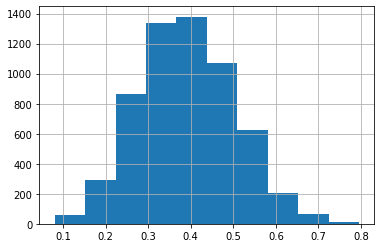

In [20]:
# Defining the generative model
def gen_model(prob):
    return(np.random.binomial(16, prob))

#  the generative model
subscribers = list()

# Simulating the data
for p in prior_rate:
    subscribers.append(gen_model(p))
                    
# Observed data
observed_data = 6

# Here you filter off all draws that do not match the data.
post_rate = prior_rate[list(map(lambda x: x == observed_data, subscribers))]

post_rate.hist() # Eyeball the posterior


# See that we got enought draws left after the filtering. 
# There are no rules here, but you probably want to aim for >1000 draws.

# Now you can summarize the posterior, where a common summary is to take the mean or the median posterior, 
# and perhaps a 95% quantile interval.


print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))

Question II
----------


In [21]:
np.mean(post_rate > 0.2) # or just np.mean(post_rate > 0.2)

0.9638983050847457

Question III
----------

Sign-up 95% quantile interval 17-64


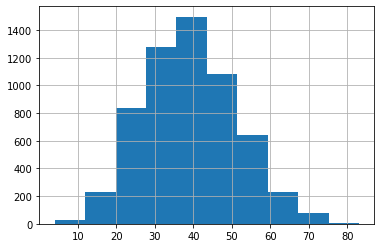

In [22]:
# This can be done with a for loop
signups = list()

for p in post_rate:
    signups.append(np.random.binomial(100, p))


# But we can write it like this:
signups = pd.Series([np.random.binomial(n = 100, p = p) for p in post_rate])

signups.hist()
print('Sign-up 95%% quantile interval %d-%d' % tuple(signups.quantile([.025, .975]).values))

So a decent guess is that is would be between 20 and 60 sign-ups.